# 基于Titanic原始乘客数据的生还因素分析

## 1. 数据介绍


survival（存活）	                            0 = No, 1 = Yes

pclass：Ticket class（舱位级别）                         1 = 1st, 2 = 2nd, 3 = 3rd

sex（性别）	

Age：Age in years（年岁）	

sibsp：# of siblings / spouses aboard the Titanic（配偶）

parch：# of parents / children aboard the Titanic（直系亲属）	

ticket：Ticket number（票号）	

fare：Passenger fare（费用）	

cabin：Cabin number（客舱号）	

embarked：Port of Embarkation（登船口岸）	               C = Cherbourg, Q = Queenstown, S = Southampton

## 2. 数据整理与初勘

In [1]:
# 读取数据 
import pandas as pd
import numpy as np

titanic=pd.read_csv('titanic-data.csv')

In [2]:
# 描述统计量 
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


基础描述统计分析发现：
1、船上共有891名乘客。
2、有38%的乘客存活。
3、所有乘客平均年龄29-30岁。

In [3]:
# 检测前排数据 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 设置PassengerId为索引
tt=titanic.set_index(['PassengerId'])
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


发现年龄、客舱号、登船口三数据均存在缺失值。

In [5]:
# 获取生还者数据 
tt_Survived = tt[tt.Survived==1]
tt_Survived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 2 to 890
Data columns (total 11 columns):
Survived    342 non-null int64
Pclass      342 non-null int64
Name        342 non-null object
Sex         342 non-null object
Age         290 non-null float64
SibSp       342 non-null int64
Parch       342 non-null int64
Ticket      342 non-null object
Fare        342 non-null float64
Cabin       136 non-null object
Embarked    340 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 32.1+ KB


排除点未生还者数据后，发现有342名生还者，但部分年龄、客舱号、登船口三类数据存在缺失值。

In [6]:
# 常用函数定义 
# 输出描述性统计分析
%pylab inline

import matplotlib.pyplot as plt
import seaborn as sns

def print_describe(data,label):
    print label
    print '平均值: ',np.mean(data)
    print '标准差: ',np.std(data)
    print '最小值: ',np.min(data)
    print '最大值: ',np.max(data)
    plt.hist(data)
    

Populating the interactive namespace from numpy and matplotlib


## 3. 数据分析

### 问题1：性别因素是否对生还造成影响？

In [7]:
# 计数
def titanic_life(data,name):
    return data.groupby(name)['Name'].count()

print titanic_life(tt,'Sex')
print titanic_life(tt_Survived,'Sex')


Sex
female    314
male      577
Name: Name, dtype: int64
Sex
female    233
male      109
Name: Name, dtype: int64


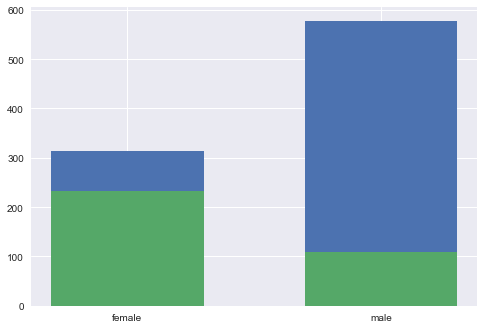

In [8]:
# 绘制条形图（性别对生还的影响）
def print_bar(data):
    plt.xticks((0,0.2),(u'female',u'male'))
    plt.bar(left=(0,0.2),height=data,width=0.12,align="center")

print_bar(titanic_life(tt,'Sex'))
print_bar(titanic_life(tt_Survived,'Sex'))

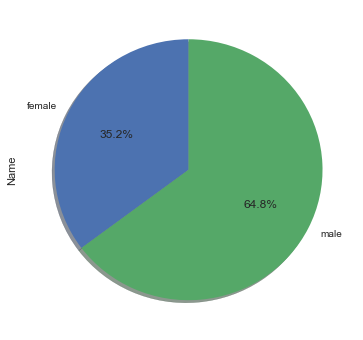

In [9]:
# 绘制饼图（全部乘客）
def print_pie(data):
    data.plot.pie(figsize=(6, 6),autopct='%3.1f%%',startangle = 90,shadow=True)

print_pie(titanic_life(tt,'Sex'))

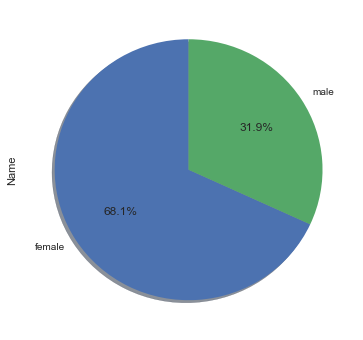

In [10]:
# 绘制饼图（生还乘客）

print_pie(titanic_life(tt_Survived,'Sex'))

Sex
female    0.742038
male      0.188908
Name: Name, dtype: float64


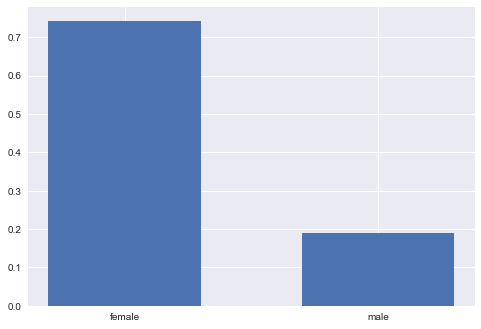

In [11]:
# 方法1：计算性别生还率    
def survival_rate(name):
    # 按照name对全体乘客进行分组后，每个组的人数
    all_passenger_count=titanic_life(tt,name)
    # 按照name对生还乘客进行分组后，每个组的人数
    survived_passenger_count=titanic_life(tt_Survived,name)
    # 每个组的生还率
    return survived_passenger_count/all_passenger_count
print survival_rate('Sex')
print_bar(survival_rate('Sex'))

### 问题1 结论：
1、女性乘客总数少于男性。
2、女性乘客生还率明显高于男性。

### 问题2：年龄因素是否对生还造成影响？

In [12]:
# 对缺失值进行处理
tt_age_analysis = tt[['Survived','Sex','Age']].dropna()
tt_Survived_age_analysis = tt_Survived[['Survived','Sex','Age']].dropna()

In [13]:
# 以10为间距对年龄进行分组统计
def cut_age(data):
    age_cut = np.arange(0,80,10)
    ages_cut = pd.cut(data.Age,age_cut)
    ages_cut_grouped = data.groupby(ages_cut)
    return ages_cut_grouped

print '全体乘客：',cut_age(tt_age_analysis).count()['Survived']
print '生还乘客：',cut_age(tt_Survived_age_analysis).count()['Survived']

全体乘客： Age
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
Name: Survived, dtype: int64
生还乘客： Age
(0, 10]     38
(10, 20]    44
(20, 30]    84
(30, 40]    69
(40, 50]    33
(50, 60]    17
(60, 70]     4
Name: Survived, dtype: int64


全体乘客的年龄
平均值:  29.6991176471
标准差:  14.5163211508
最小值:  0.42
最大值:  80.0
生还乘客的年龄
平均值:  28.3436896552
标准差:  14.9251522203
最小值:  0.42
最大值:  80.0


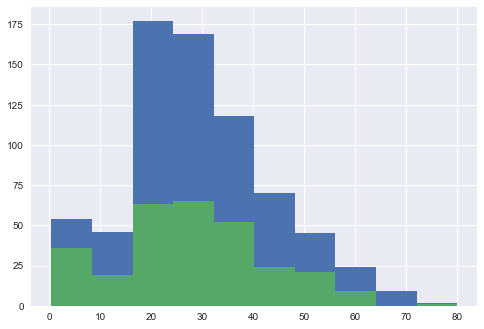

In [14]:
# 打印基本信息并反馈
print_describe(tt_age_analysis['Age'],'全体乘客的年龄')
print_describe(tt_Survived_age_analysis['Age'],'生还乘客的年龄')

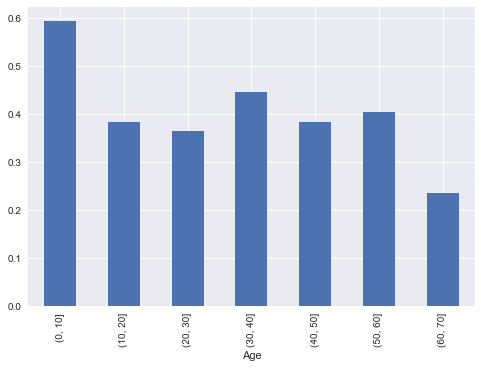

In [15]:
# 生存率计算方法2：计算不同年龄分组下的生存率
def print_bar_age(data):
    ages = np.arange(0,80,10)
    tt_age_cut = pd.cut(data.Age,ages)
    tt_age_cut_grouped = data.groupby(tt_age_cut)
    tt_age_cut_analysis = (tt_age_cut_grouped.sum()/tt_age_cut_grouped.count())['Survived']
    tt_age_cut_analysis.plot(kind='bar')

print_bar_age(tt_age_analysis)

### 问题2 结论：
10岁以下乘客生还率最高。

### 问题3：年龄、性别共同对生还结果的影响？

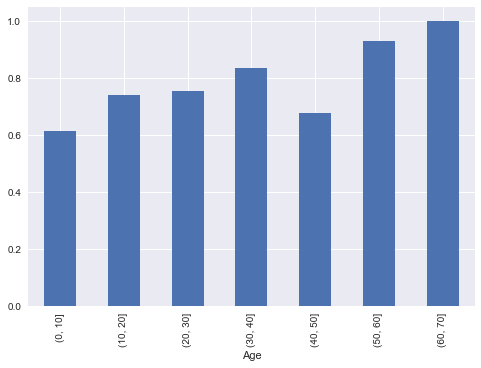

In [16]:
# 女性如下
tt_age_analysis_female=tt_age_analysis[tt_age_analysis.Sex=='female']
print_bar_age(tt_age_analysis_female)

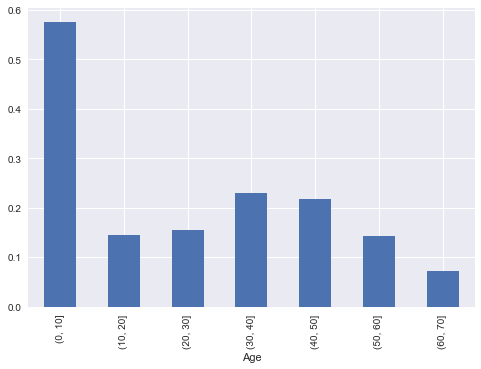

In [17]:
# 男性如下
tt_age_analysis_male=tt_age_analysis[tt_age_analysis.Sex=='male']
print_bar_age(tt_age_analysis_male)

### 问题3 结论：
1、女性：32-36岁，48岁及以上存在着高的乘客生还率。
2、男性：12岁以下存在着较高的乘客生还率；各年龄段上乘客生还率均明显低于女性。

### 问题4：仓位因素是否对生还造成影响？

In [18]:
# 计数

print titanic_life(tt,'Pclass')
print titanic_life(tt_Survived,'Pclass')

Pclass
1    216
2    184
3    491
Name: Name, dtype: int64
Pclass
1    136
2     87
3    119
Name: Name, dtype: int64


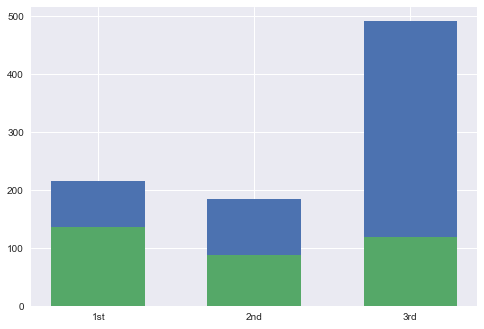

In [19]:
# 绘制条形图（仓位乘客分布图）

def print_bar2(data):
    plt.xticks((0,0.2,0.4),(u'1st',u'2nd',u'3rd'))
    plt.bar(left=(0,0.2,0.4),height=data,width=0.12,align="center")

print_bar2(titanic_life(tt,'Pclass'))
print_bar2(titanic_life(tt_Survived,'Pclass'))

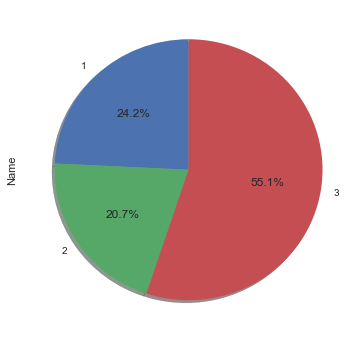

In [20]:
# 绘制饼图（全部仓位）
print_pie(titanic_life(tt,'Pclass'))

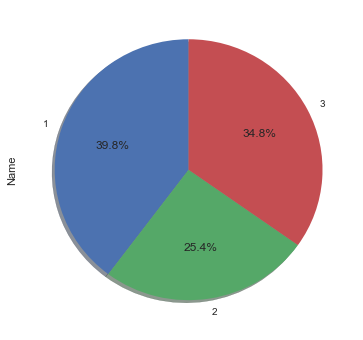

In [21]:
# 绘制饼图（生还）
print_pie(titanic_life(tt_Survived,'Pclass'))

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Name, dtype: float64


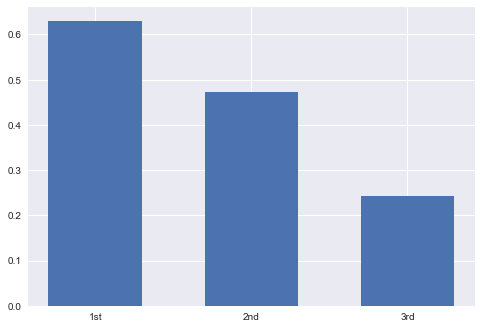

In [22]:
# 计算仓位生还率    

print survival_rate('Pclass')
print_bar2(survival_rate('Pclass'))

### 问题4 结论:
1、三等舱乘客最多。
2、一等舱乘客生还率最高；舱位环境越恶劣，生还率越低。

### 问题5：舱位、性别共同对生还结果的影响？

In [31]:
# 按性别计算各舱位人数
print tt.groupby(['Sex','Pclass']).count()['Survived']

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Survived, dtype: int64


In [30]:
# 按性别计算各舱位生还人数
print tt_Survived.groupby(['Sex','Pclass']).count()['Survived']

Sex     Pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: Survived, dtype: int64


Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Name, dtype: float64


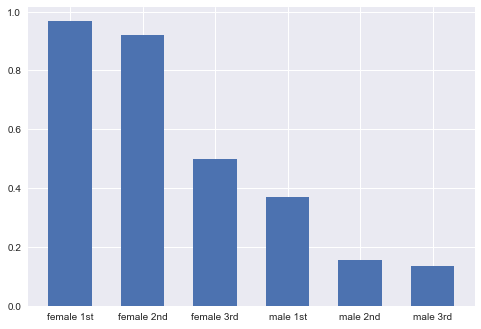

In [24]:
# 计算仓位生还率 
print survival_rate(['Sex','Pclass'])

def print_bar3(data):
    plt.xticks((0,0.2,0.4,0.6,0.8,1.0),(u'female 1st',u'female 2nd',u'female 3rd',u'male 1st',u'male 2nd',u'male 3rd'))
    plt.bar(left=(0,0.2,0.4,0.6,0.8,1.0),height=data,width=0.12,align="center")
    
print_bar3(survival_rate(['Sex','Pclass']))

###  问题5 结论：
1、女性生还率明显高于男性。
2、舱位越好，生还率越高。
3、年龄相比于舱位对生还率的影响更大。

## 4. 总结与反思

### 总结：

1、项目总体研究了性别、年龄、舱位对乘客生还率结果的影响，研究发现三因素性别因素影响最大。

2、各因素中：女性比男性生还率高，舱位环境越好生还率越高，年龄段越小或越大生还率越高。

### 本研究的局限：

1、部分数据存在缺失值。

2、数据间仅研究了相关性的存在，并未通过实验研究因果关系。

3、还有一些因素可能会影响生还率，比如乘客的职业、身体素质、求生意识等，但是数据中并没有给出。